In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets
import seaborn as sns

%matplotlib notebook

In [2]:
# Store data in Pandas DataFrame
diabetes = pd.read_csv('data/diabetes.csv')

# Store data in numpy array
data = np.genfromtxt('data/diabetes.csv', delimiter=',')
data = data[1:, :]

# Sort data according to class
data = data[data[:, 8].argsort()]

# Split data array into individual classes
class_one = data[:500, :]
class_two = data[500:, :]

# Get input and output vectors for both classes
X1 = class_one[:, :8]
Y1 = class_one[:, 8]

X2 = class_two[:, :8]
Y2 = class_two[:, 8]

# Compute class averages
mu_one = (1 / len(X1)) * np.sum(X1, axis=0)
mu_two = (1 / len(X2)) * np.sum(X2, axis=0)

# Create matrices of class means
# mean_one = np.tile(mu_one, (len(X1), 1))
# mean_two = np.tile(mu_two, (len(X2), 1))

# Compute class scatter matrices
S1 = np.zeros((len(mu_one), len(mu_one)))
for i in range(len(X1)):
    mean_vec = X1[i, :] - mu_one
    S1 += np.outer(mean_vec, mean_vec)

S2 = np.zeros((len(mu_two), len(mu_two)))
for j in range(len(X2)):
    mean_vec = X2[j, :] - mu_two
    S2 += np.outer(mean_vec, mean_vec)

# Compute within-class scatter matrix
SW = S1 + S2

# Compute the optimum theta value
theta = np.linalg.inv(SW) @ (mu_two - mu_one)

<IPython.core.display.Javascript object>


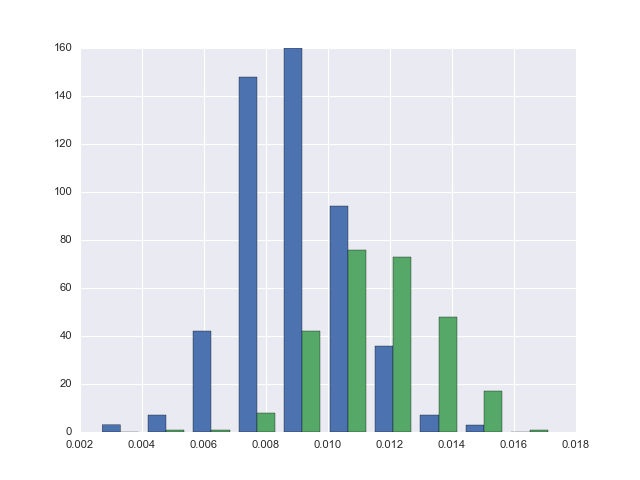

([array([   3.,    7.,   42.,  148.,  160.,   94.,   36.,    7.,    3.,    0.]),
  array([  0.,   1.,   1.,   8.,  42.,  76.,  73.,  48.,  17.,   1.])],
 array([ 0.00257002,  0.00403647,  0.00550291,  0.00696936,  0.0084358 ,
         0.00990225,  0.01136869,  0.01283514,  0.01430159,  0.01576803,
         0.01723448]),
 <a list of 2 Lists of Patches objects>)

In [3]:
# Compute Projections
theta_star = theta[:, None]

class_one_projs = X1 @ theta_star
class_two_projs = X2 @ theta_star

# Plot Projections
plt.figure()
plt.hist([class_one_projs, class_two_projs])

In [4]:
X = np.vstack((class_one_projs, class_two_projs))
m = len(X)

y = np.concatenate((Y1, Y2))
y = y.T

b = np.linalg.inv(X.T @ X) @ (X.T @ y) / 767

In [5]:
# Test Classification
# Average two class one points
avg_pt = (X1[0, :] + X1[1, :]) / 2

# Project test point
pt_proj = avg_pt @ theta_star